In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 6.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=76e9356601406c883abb37e4a05de3602227e5ba3dcf0e80097998d274571c1c
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import warnings 
warnings.filterwarnings("ignore")

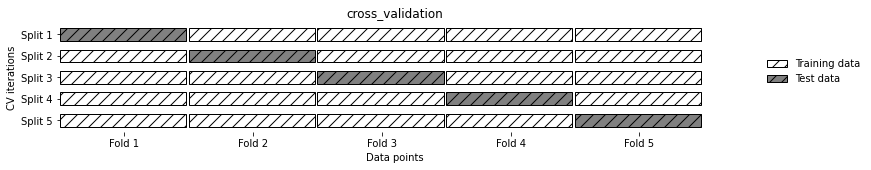

In [3]:
import mglearn
mglearn.plots.plot_cross_validation()

##cross val score

In [4]:
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#load_data 
iris = load_iris()

x = iris.data
y = iris.target
#model 
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=0)
#model_score 
score_lr = cross_val_score(model_lr,x,y,cv=5) # cv =split 을 5번 한 다른 test data 영역 의 test_score 를 보여줌
print(score_lr)
score_dt = cross_val_score(model_dt,x,y,cv=5)
print(score_dt)

#test_mean 
score_lr_mean = score_lr.mean()
score_dt_mean = score_dt.mean()

print(score_lr_mean)
print(score_dt_mean)


[0.96666667 1.         0.93333333 0.96666667 1.        ]
[0.96666667 0.96666667 0.9        0.96666667 1.        ]
0.9733333333333334
0.9600000000000002


##cross_validate

In [5]:
from sklearn.model_selection import cross_validate 
model_lr_score_validate = cross_validate(model_lr,x,y,cv=5,return_train_score = True)
#return_train_score = True 로 하면 train_score 도 볼수 있음 
model_lr_score_validate

{'fit_time': array([0.02846956, 0.02570415, 0.03129506, 0.02353048, 0.02598166]),
 'score_time': array([0.0004065 , 0.00040579, 0.00052547, 0.00038743, 0.00040221]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [6]:
import pandas as pd 
df = pd.DataFrame(model_lr_score_validate)
display(df)
df.mean()

,fit_time,score_time,test_score,train_score
0,0.028470,0.000407,0.966667,0.966667
1,0.025704,0.000406,1.000000,0.966667
2,0.031295,0.000525,0.933333,0.983333
3,0.023530,0.000387,0.966667,0.983333
4,0.025982,0.000402,1.000000,0.975000


fit_time       0.026996
score_time     0.000425
test_score     0.973333
train_score    0.975000
dtype: float64

##KFold

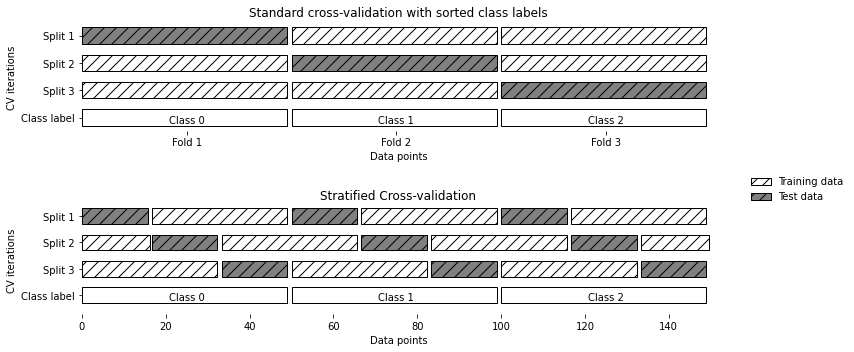

In [7]:
mglearn.plots.plot_stratified_cross_validation()

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 3)
cross_val_score(model_lr,x,y,cv = kfold) #3개로 나누면 0 1 2 로만 나눠서 데이터의 정확도가 0 됨 

array([0., 0., 0.])

In [9]:
kfold = KFold(n_splits = 3 ,shuffle = True,random_state=0)
scores = cross_val_score(model_lr,x,y,cv = kfold)
print(scores.mean(),scores)

0.9666666666666667 [0.98 0.96 0.96]


##shuffle split 

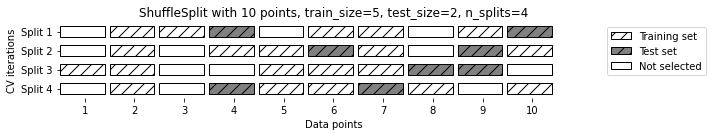

In [10]:
mglearn.plots.plot_shuffle_split()

In [11]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits = 10,train_size =0.5,test_size=0.2,random_state=0)
cross_val_score(model_lr,x,y,cv=ss)

array([1.        , 0.96666667, 0.96666667, 0.9       , 0.96666667,
       0.96666667, 1.        , 1.        , 0.96666667, 0.96666667])

##GroupKFold

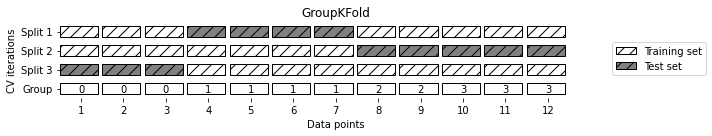

In [12]:
mglearn.plots.plot_group_kfold()

In [13]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples = 12 ,random_state = 0)

groups = [0,0,0,1,1,1,1,2,2,3,3,3] #label 값이 아닌 그룹핑으로 코딩 

gkf = GroupKFold(n_splits = 4)
cross_val_score(model_lr,x,y,cv = gkf,groups=groups)

array([0.75      , 0.66666667, 0.66666667, 1.        ])

##repeatedstratifiedkfold

반복 교차 검증 
반복 횟수 
n_splits * n_repeats

In [14]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(random_state = 0 ,n_splits = 5 ,n_repeats = 10)
scores = cross_val_score(model_lr,iris.data,iris.target,cv = rskfold)
print(scores.mean(),'\n',scores)

0.9640000000000001 
 [0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 1.
 0.9        0.96666667 1.         1.         0.93333333 1.
 1.         0.93333333 0.96666667 1.         0.9        1.
 0.9        1.         1.         0.93333333 0.96666667 0.96666667
 0.93333333 0.9        1.         1.         1.         0.96666667
 0.93333333 0.96666667 1.         0.96666667 0.93333333 1.
 0.96666667 0.9        0.96666667 1.         0.96666667 1.
 0.9        0.96666667 0.96666667 0.96666667 0.96666667 0.9
 0.96666667 1.        ]


##Grid Search

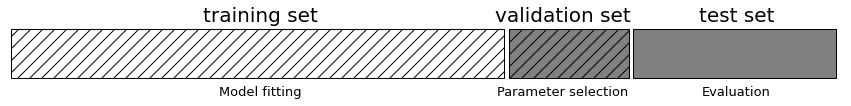

In [15]:
mglearn.plots.plot_threefold_split()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

trainval_x,test_x,trainval_y,test_y = train_test_split(iris.data,iris.target,random_state = 0)
print(trainval_x.shape)

train_x,val_x,train_y,val_y = train_test_split(trainval_x,trainval_y,random_state = 0)
print(train_x.shape)
print(val_x.shape)

best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
  for C in [0.001,0.01,0.1,1,10,100]:
    model = SVC(C = C,gamma = gamma).fit(train_x,train_y)
    score = model.score(val_x,val_y)
    if best_score < score:
      best_score = score
      best_parameter = {'C':C,'gamma':gamma}

best_score,best_parameter

(112, 4)
(84, 4)
(28, 4)


(1.0, {'C': 100, 'gamma': 0.001})

In [17]:
#dictionary 는 함수나 객체로 호출할 때 **kwargs 인자로 불러야 한다.
svm = SVC(**best_parameter).fit(train_x,train_y)
svm.score(test_x,test_y)

0.9736842105263158

##교차 검증을 통한 그리드 서치 


In [18]:

best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
  for C in [0.001,0.01,0.1,1,10,100]:
    model = SVC(C = C,gamma = gamma).fit(train_x,train_y)
    score = cross_val_score(model,trainval_x,trainval_y,cv = 5) #교차 검증은 train+val 합한 값으로 사용해야 한다
    score = score.mean()
    if best_score < score:
      best_score = score
      best_parameter = {'C':C,'gamma':gamma}

best_score,best_parameter

(0.9731225296442687, {'C': 10, 'gamma': 0.1})

In [19]:
svm = SVC(**best_parameter).fit(trainval_x,trainval_y)
svm.score(test_x,test_y)

0.9736842105263158

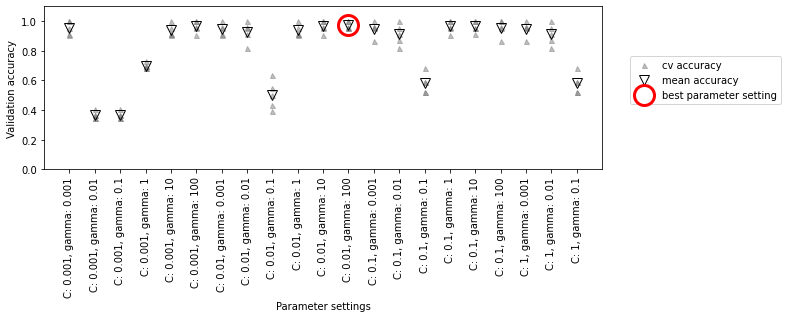

In [20]:
mglearn.plots.plot_cross_val_selection()

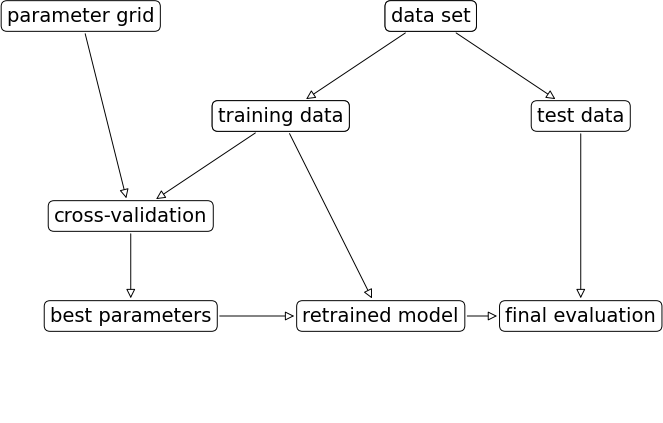

In [21]:
mglearn.plots.plot_grid_search_overview()

##GridSearchCV 메소드를 이용한 그리드 서치

In [22]:
# param_grid
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
              'gamma':[0.001,0.01,0.1,1,10,100]}

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


grid_search = GridSearchCV(SVC(),param_grid,cv = 5,return_train_score =True)

In [24]:
grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [25]:
grid_search.score(test_x,test_y)

0.9736842105263158

In [26]:
print(grid_search.best_estimator_) #최고의 모델 설정값
print(grid_search.best_index_) #제일 좋은 인덱스
print(grid_search.best_params_) #제일 좋은 파라미터 값
print(grid_search.best_score_) #제일 좋은 score 값

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
31
{'C': 100, 'gamma': 0.01}
0.9757352941176471


##교차 검증 결과 분석

In [27]:
import pandas as pd 
import numpy as np 
df = pd.DataFrame(grid_search.cv_results_)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.00158744,0.00115805,0.000709534,0.00064621,0.000631285,0.000660419,0.000629711,0.000628185,0.000628281,0.00110369,0.000642204,0.00069685,0.000606489,0.000595045,0.000563574,0.000589085,0.000607443,0.000653028,0.000636005,0.000517941,0.000448799,0.000523758,0.000715923,0.000724268,0.000522804,0.000433922,0.000426531,0.000534678,0.000718641,0.000735664,0.000442505,0.000419998,0.000428677,0.000516129,0.000719547,0.00074091
std_fit_time,0.000170734,0.000130735,3.29973e-05,2.69785e-05,2.35044e-05,2.50451e-05,1.57626e-05,1.98369e-05,7.98955e-06,0.000254247,9.72865e-06,5.11356e-05,6.66276e-06,9.81798e-06,6.47059e-06,4.55723e-06,7.68788e-06,9.08497e-06,3.67501e-05,9.03175e-06,8.70094e-06,2.61542e-05,2.23351e-06,1.21929e-05,1.34721e-05,1.21822e-05,1.81073e-05,3.91087e-05,1.15582e-05,1.34613e-05,1.51128e-05,5.78645e-06,1.07347e-05,2.07396e-05,1.6133e-05,2.98504e-05
mean_score_time,0.000819159,0.000488806,0.00034399,0.000321674,0.000320387,0.00032649,0.000321388,0.000332832,0.000311661,0.000539017,0.00037241,0.000331879,0.000311518,0.000309753,0.000313187,0.000309086,0.000305605,0.000355053,0.000313282,0.000300455,0.000291061,0.000283909,0.000332212,0.000332451,0.000300741,0.000289965,0.000288296,0.000296354,0.000309277,0.000316668,0.00028863,0.000286245,0.000270557,0.000287533,0.000309038,0.000324583
std_score_time,0.000231532,5.69072e-05,1.47021e-05,1.88326e-05,1.29331e-05,1.41594e-05,8.76006e-06,1.47195e-05,1.34434e-05,0.000147302,6.26483e-05,1.51098e-05,1.25605e-05,3.16801e-06,9.25924e-06,1.09803e-05,5.85443e-06,8.4934e-05,1.10653e-05,5.28494e-06,8.61005e-06,7.99382e-06,4.11957e-05,1.64136e-05,7.40956e-06,1.36939e-05,1.2563e-05,1.56451e-05,9.25285e-06,1.1076e-05,1.21426e-05,2.17197e-05,6.49164e-06,1.15262e-05,6.23436e-06,1.27036e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1}","{'C': 0.01, 'gamma': 10}","{'C': 0.01, 'gamma': 100}","{'C': 0.1, 'gamma': 0.001}","{'C': 0.1, 'gamma': 0.01}","{'C': 0.1, 'gamma': 0.1}","{'C': 0.1, 'gamma': 1}","{'C': 0.1, 'gamma': 10}","{'C': 0.1, 'gamma': 100}","{'C': 1, 'gamma': 0.001}","{'C': 1, 'gamma': 0.01}","{'C': 1, 'gamma': 0.1}","{'C': 1, 'gamma': 1}","{'C': 1, 'gamma': 10}","{'C': 1, 'gamma': 100}","{'C': 10, 'gamma': 0.001}","{'C': 10, 'gamma': 0.01}","{'C': 10, 'gamma': 0.1}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
split0_test_score,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.705882,0.941176,0.941176,0.352941,0.352941,0.705882,0.882353,0.941176,0.941176,1,0.705882,0.882353,0.941176,1,0.941176,1,0.705882,0.941176,1,0.941176,0.941176,1,0.705882
split1_test_score,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.705882,0.941176,1,0.352941,0.352941,0.705882,1,1,0.941176,0.705882,0.588235,1,1,0.941176,0.941176,0.705882,0.588235,1,1,0.941176,0.941176,0.705882,0.588235
split2_test_score,0.294118,0.294118,0.294118,0.294118,0.294118,0.294118,0.294118,0.294118,0.294118,0.294118,0.294118,0.294118,0.294118,0.529412,0.705882,0.941176,0.294118,0.294118,0.647059,0.823529,0.941176,0.941176,0.705882,0.411765,0.823529

## C 와 gamma 의 시각화 

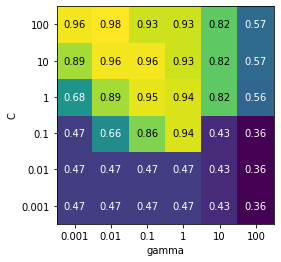

In [28]:
scores  = np.array(df.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores,xlabel = 'gamma',ylabel = 'C',xticklabels=param_grid['gamma'],yticklabels=param_grid['C'])

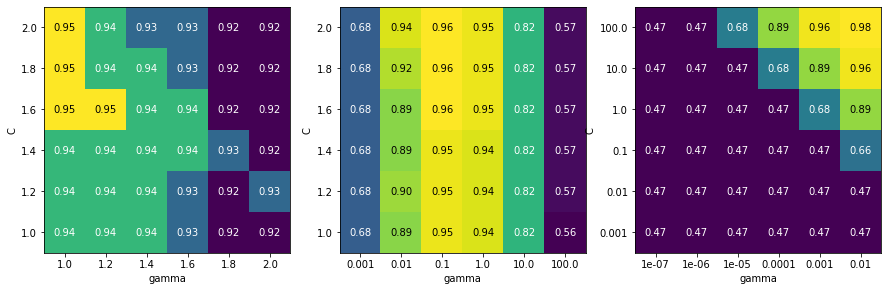

In [29]:
import matplotlib.pyplot as plt

pg_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)} #구간별 값
pg_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)} #log 값
pg_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)} #log 값 심화

fig,axes = plt.subplots(1,3,figsize = (15,5))

for pg,ax in zip([pg_linear,pg_log,pg_range],axes):
  grid_search = GridSearchCV(SVC(),param_grid = pg,cv = 5).fit(train_x,train_y)
  scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
  mglearn.tools.heatmap(scores,xlabel = 'gamma',ylabel = 'C',xticklabels=pg['gamma'],yticklabels=pg['C'],ax = ax)

##Confusion matrix (혼합 행렬) 

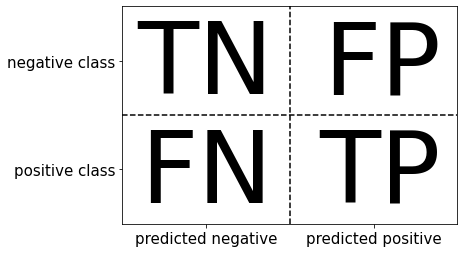

In [30]:
mglearn.plots.plot_binary_confusion_matrix()

In [31]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()
digits.target_names

#불균형 데이터 셋을 생성 
y = digits.target == 9
x = digits.data

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)
train_x.shape

(1347, 64)

In [32]:
model_lr = LogisticRegression(C = 0.1,max_iter = 10000).fit(train_x,train_y)
print(model_lr.score(train_x,train_y),model_lr.score(test_x,test_y))

0.9977728285077951 0.9844444444444445


In [40]:
from sklearn.metrics import confusion_matrix
pred_lr = model_lr.predict(test_x)
confusion_matrix(test_y,pred_lr)

array([[402,   1],
       [  6,  41]])

In [35]:
model_tree = DecisionTreeClassifier(random_state=0).fit(train_x,train_y)
model_tree.score(train_x,train_y) , model_tree.score(test_x,test_y)

(1.0, 0.9533333333333334)

In [39]:
pred_tree= model_tree.predict(test_x)
confusion_matrix(test_y,pred_tree)

array([[394,   9],
       [ 12,  35]])

##오차행렬
- 정확도 
  예측이랑 실제 값이 동일한 경우 / 전체 데이터의 예측 건수 

  TP + TN / (TP+TN+FP+FN)  
- 정밀도(precision)
  맞았다고 예측 한것중에 실제로 맞은 값의 비율 
  
  TP / (TP + FP)

- 재현율(recall)
  실제 값 = 1 인데 예측값이 1 인 비율 


  TP / TP + FN

- f1 score 

  2 * 정밀도  * 재현율 / 정밀도  + 재현율 
  


In [43]:
from sklearn.metrics import f1_score

#f1 score 로 실제값과 예측값을 score 비교
print(f1_score(test_y,pred_lr)) 
print(f1_score(test_y,pred_tree))

(0.9213483146067415, 0.7692307692307692)

##분류 리포트(classification report)

- 정밀도 재현율 f1 score 결과 값 까지 출력 

주요 매개변수는 

true_y(실제 y) 

pred_y(예측 y)  

target_names = 결과 레이블의 이름 

In [46]:
from sklearn.metrics import classification_report

print(classification_report(test_y,pred_lr,target_names= ['Not Nine','Nine']))

              precision    recall  f1-score   support

    Not Nine       0.99      1.00      0.99       403
        Nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [47]:

print(classification_report(test_y,pred_tree,target_names = ['Not Nine','Nine']))

              precision    recall  f1-score   support

    Not Nine       0.97      0.98      0.97       403
        Nine       0.80      0.74      0.77        47

    accuracy                           0.95       450
   macro avg       0.88      0.86      0.87       450
weighted avg       0.95      0.95      0.95       450



##ROC curve

- 이진 분류기에서 사용 

- 예측 의 True 이고 실제 값이 True 인 비율 과 예측이 False 인데 실제 값이 True 인 경우 가 곡선(curve) 로 나타내어 분류기 가 좋은지 판단하는 과정이다 

##AUC 

- Roc curve 곡선의 아래 면적의 값이다 

###roc_curve: ROC 곡선을 그리는 메소드 

-주요 매개변수 밑 리턴 값 

true_y : y의 실제 값 
y_score: 이떄 score 값을 구할 떄 확률값이 무조건 필요하다 
즉 model.predict_proba 의 반환값을 가진 데이터 만가능하다 

##decision_function 
분류 모델에서 예측의 불확실성을 추정할수 있는 기능으로 decision_function ,predict_proba 가 있는데 보통 2가지 다 제공하지만 1가지만 제공하는 경우도 있다.

(4500, 2) (4500,)
(3375, 2)


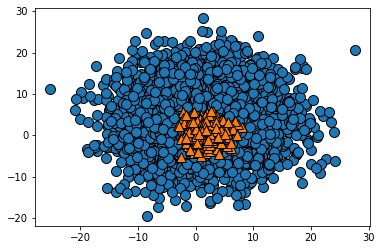

In [51]:
# 데이터 포인트 
x,y = make_blobs(n_samples=[4000,500],random_state= 0 ,cluster_std= [7.0,2.0])
print(x.shape ,y.shape)

mglearn.discrete_scatter(x[:,0],x[:,1],y)

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)
print(train_x.shape)

ROC 곡선은 위로 곡선이 그려지는것이 제일 이상적이다. 

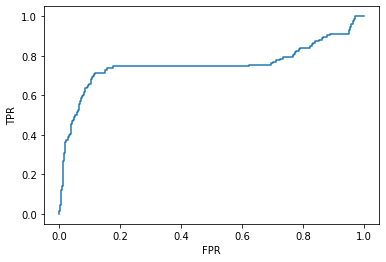

In [58]:
#ROC 곡선 그리기 - SVC
from sklearn.metrics import roc_curve

model_svc = SVC(gamma = 0.5).fit(train_x,train_y)
fpr_svc,tpr_svc,th_svc = roc_curve(test_y,model_svc.decision_function(test_x))
#plt.plot(fpr_svc,tpr_svc)
#plt.xlabel('FPR')
#plt.ylabel('TPR')
#plt.show()

In [63]:
#ROC 곡선 그리기  - RandomForest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state = 0).fit(train_x,train_y)
fpr_rf,tpr_rf,th_rf = roc_curve(test_y,model_rf.predict_proba(test_x)[:,1])



ROC 는 RandomForest 가 더 좋은 이진 분류기 인것을 알수 있다.

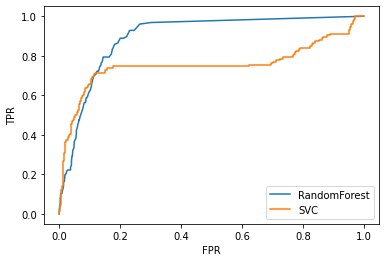

In [62]:

plt.plot(fpr_rf,tpr_rf,label = 'RandomForest')
plt.plot(fpr_svc,tpr_svc,label = 'SVC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [71]:
#AUC 
from sklearn.metrics import roc_auc_score
#random_forest 의 auc_score 값
rf_auc = roc_auc_score(test_y,model_rf.predict_proba(test_x)[:,1])
#SVC 의 auc_score 값
svc_auc = roc_auc_score(test_y,model_svc.decision_function(test_x))
print(rf_auc,svc_auc)

0.8956257845146735 0.7527765861099195


## 유방암 데이터로 실습 

In [72]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target



In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0 , stratify = y)
model_lr = LogisticRegression().fit(train_x,train_y)
model_lr.score(train_x,train_y),model_lr.score(test_x,test_y)

(0.9577464788732394, 0.9300699300699301)

In [76]:
from sklearn import metrics 
pred_lr = model_lr.predict(test_x)
print(metrics.classification_report(test_y,pred_lr,target_names = ['악성','양성']))

              precision    recall  f1-score   support

          악성       0.92      0.89      0.90        53
          양성       0.93      0.96      0.95        90

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



##ROC 곡선 그리기 

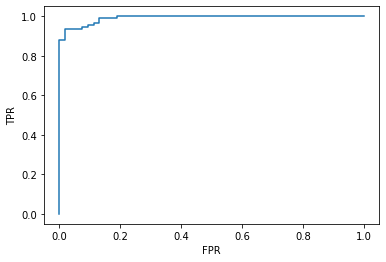

In [79]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_lr , tpr_lr, th_lr = roc_curve(test_y,model_lr.decision_function(test_x))
plt.plot(fpr_lr,tpr_lr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##C 값 조정 

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
grid_search = GridSearchCV(LogisticRegression(),param_grid=param_grid,cv = 5 ,return_train_score = True)

grid_search.fit(train_x,train_y)
pred_gs = grid_search.predict(test_x)

#분류 리포트 
print(metrics.classification_report(test_y,pred_gs))
#혼합 행렬 
print(metrics.confusion_matrix(test_y,pred_gs))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.97      0.96      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

[[50  3]
 [ 4 86]]


In [87]:
#grid_search 의 score ,parameter 값 

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10}
0.9483173734610123


##Roc 곡선 비교 

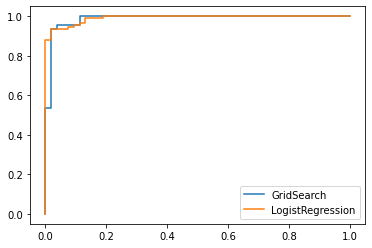

0.9907756813417191
0.9865828092243187


In [91]:
fpr_gs,tpr_gs,th_gs = roc_curve(test_y,grid_search.predict_proba(test_x)[:,1])
plt.plot(fpr_gs,tpr_gs,label='GridSearch')
plt.plot(fpr_lr,tpr_lr,label = 'LogistRegression')
plt.legend()
plt.show()

lr_auc = roc_auc_score(test_y,model_lr.predict_proba(test_x)[:,1])
gs_auc = roc_auc_score(test_y,grid_search.decision_function(test_x))

print(lr_auc)
print(gs_auc)

'''
0.9907756813417191 lr 이 아래 면적이 더 넓기 때문에 더 좋은 모델이라고 할수 있다.
0.9865828092243187
'''

##scoring 을 이용한 ROC 교차 검증 

In [93]:
from sklearn.model_selection import cross_val_score
C_list = [0.001,0.01,0.1,1,10,100,1000]

for C in C_list:
  m = LogisticRegression(C = C)
  rs = cross_val_score(m,train_x,train_y,cv = 5,scoring='roc_auc') #scoring 은 채점기의 평가지표를 지정할수 있다. roc_auc , accuracy 등등
  print(C,':',rs.mean())
  

0.001 : 0.9841040694528977
0.01 : 0.9800585677734948
0.1 : 0.9829086218750703
1 : 0.983047045828543
10 : 0.9857399376704764
100 : 0.9823460500214154
1000 : 0.9849335565023332


In [95]:
for C in C_list:
  m = LogisticRegression(C = C)
  rs = cross_val_score(m,train_x,train_y,cv = 5) #scoring 의 default 는 accuracy 이다 
  print(C,':',rs.mean())

0.001 : 0.93890560875513
0.01 : 0.9342270861833105
0.1 : 0.9366073871409029
1 : 0.9366073871409029
10 : 0.9483173734610123
100 : 0.9460191518467852
1000 : 0.9460191518467852


In [100]:
##그리드 서치 로 scoring 
param_grid = {'C':[0.0001,0.001,0.01,1,10,100,1000]}
grid_search = GridSearchCV(LogisticRegression(),param_grid=param_grid,cv = 5,scoring='roc_auc',return_train_score=True)
grid_search.fit(train_x,train_y)

pred_gs = grid_search.predict(test_x)
print(metrics.classification_report(test_y,pred_gs))
metrics.confusion_matrix(test_y,pred_gs)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.97      0.96      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



array([[50,  3],
       [ 4, 86]])

In [101]:
metrics.SCORERS #metrics 로 볼수 있는 매개변수 

{'accuracy': make_scorer(accuracy_score),
 'adjusted_mutual_info_score': make_scorer(adjusted_mutual_info_score),
 'adjusted_rand_score': make_scorer(adjusted_rand_score),
 'average_precision': make_scorer(average_precision_score, needs_threshold=True),
 'balanced_accuracy': make_scorer(balanced_accuracy_score),
 'completeness_score': make_scorer(completeness_score),
 'explained_variance': make_scorer(explained_variance_score),
 'f1': make_scorer(f1_score, average=binary),
 'f1_macro': make_scorer(f1_score, pos_label=None, average=macro),
 'f1_micro': make_scorer(f1_score, pos_label=None, average=micro),
 'f1_samples': make_scorer(f1_score, pos_label=None, average=samples),
 'f1_weighted': make_scorer(f1_score, pos_label=None, average=weighted),
 'fowlkes_mallows_score': make_scorer(fowlkes_mallows_score),
 'homogeneity_score': make_scorer(homogeneity_score),
 'jaccard': make_scorer(jaccard_score, average=binary),
 'jaccard_macro': make_scorer(jaccard_score, pos_label=None, average=mac

##회귀의 평가 지표 
mse
mae
R2
rmse
msle
Rmsle

In [102]:
from sklearn.datasets import load_boston

boston = load_boston()

In [104]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(boston.data, 
                                                    boston.target, 
                                                    random_state=0)

param_grid = {'alpha': np.logspace(-4, 0, 200) }
grid_search = GridSearchCV(Ridge(), param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_score_, grid_search.best_params_

(-22.337625164158208, {'alpha': 0.0001})

In [105]:
rmse = np.sqrt(-1 * grid_search.best_score_)

In [106]:
rmse

4.726269688047669